In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import pymysql
from sqlite3 import dbapi2 as sq3
from pathlib import Path

import time
import copy
import random

from datetime import datetime
from dateutil import rrule

from io import BytesIO
from collections import OrderedDict
PATHSTART = '.'

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# function to connect to wiki_dbs and query
def connect_and_query(wiki_name, query, cnf_path = "/home/paws/.my.cnf"):
    
    conn = pymysql.connect(host = wiki_name + '.analytics.db.svc.wikimedia.cloud',
                           read_default_file = cnf_path,
                           database = wiki_name + '_p')
    
    with conn.cursor() as cur:
        cur.execute(query)
        data = cur.fetchall()
    
    conn.close()
    return data

In [6]:
query = """
SELECT 
    p.page_title AS template_name,  -- Select the template's name
    COUNT(*) AS usage_count         -- Count how many times each template is used
FROM templatelinks tl
JOIN page p 
    ON tl.tl_target_id = p.page_id  -- Join with the 'page' table using the template's page ID
WHERE p.page_namespace = 10         -- Filter to include only pages in the 'Template' namespace (10)
GROUP BY p.page_title               -- Group by template name to count occurrences
ORDER BY usage_count DESC          
LIMIT 25;                           -- Get the top 25 most used templates
"""

output = connect_and_query('enwiki', query)
df = pd.DataFrame(output, columns=['template_name', 'usage_count'])


In [7]:
df

,template_name,usage_count
0,b'Footer_Sweden_Swimming_1992_Summer_Olympics',69666
1,b'Fungus-stub',6740
2,b'US-boxing-Olympic-medalist-stub',6624
3,b'UK_railway_stations',2892
4,b'Manitoba-road-stub',2524
5,b'Australia-wintersport-bio-stub',2308
6,b'Pacific_Islands',2031
7,b'Wikisourcepar',1829
8,b'Winchester',1487
9,b'Cite_EU_law/doc',1338


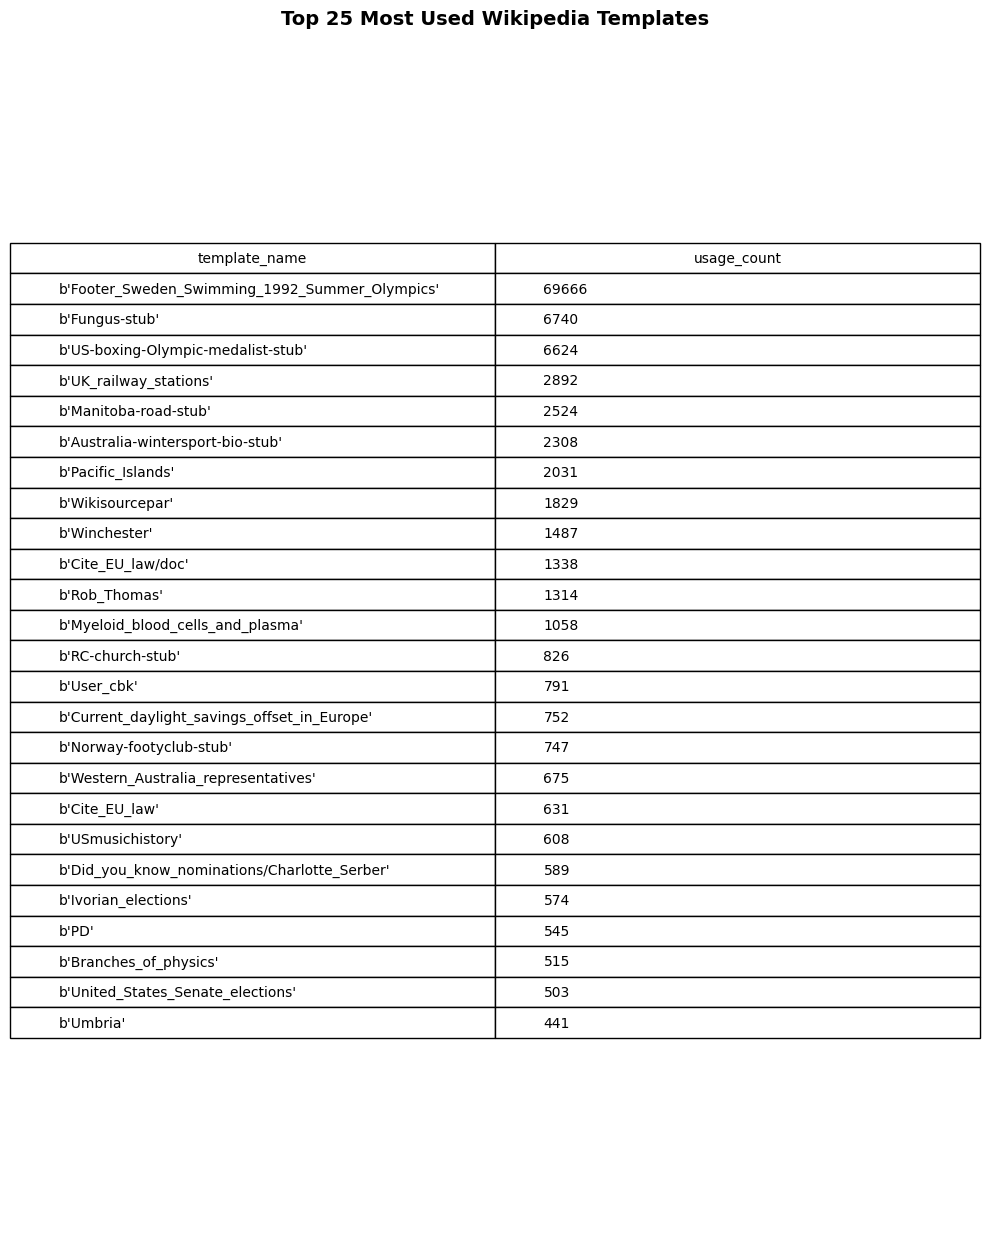

In [9]:
import matplotlib.pyplot as plt
# Plot table
fig, ax = plt.subplots(figsize=(10, len(df) * 0.5))
ax.axis('off')  # Hide the axis

# Draw the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='left', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)  # Adjust scale if needed

plt.title("Top 25 Most Used Wikipedia Templates", fontsize=14, weight='bold', pad=20)
plt.tight_layout()
plt.show()